In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

file path did not work
file path did not work


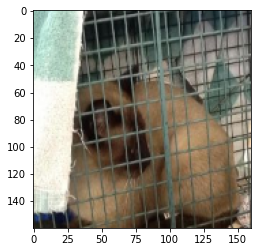

In [6]:
data = []
dirpath = "" #insert your directory of where the images are 
folders = ['Bombay','Siamese']
for folder in folders:
    path = os.path.join(dirpath, folder)
    for img_path in os.listdir(path):
        try: 
            image_arr = cv2.imread(os.path.join(path, img_path))
            img_rgb=cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_rgb,(160, 160))
            data.append([new_array, folders.index(folder)])
            plt.imshow(new_array)
        except:
            print("file path did not work")
        

In [7]:
len(data)

169

In [8]:
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [9]:
X = np.array(X)

In [10]:
X.shape

(169, 160, 160, 3)

In [11]:
graph_y = pd.Series(y).map({0:'bombay', 1:'siamese'})

Text(0.5, 0, 'Cat breeds')

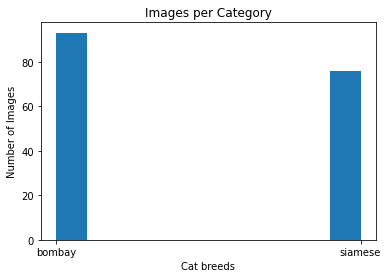

In [12]:
plt.hist(graph_y)
plt.title('Images per Category')
plt.ylabel('Number of Images')
plt.xlabel('Cat breeds')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [14]:
#Normalize the scale to 0-1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [15]:
X_train.shape

(126, 160, 160, 3)

In [16]:
cats_train = []
for i, img in enumerate(X_train):
    train = pd.Series(img.flatten(), name = i)
    cats_train.append(train)

In [17]:
cats_test=[]
for a, each in enumerate(X_test):
    cat_test = pd.Series(each.flatten(), name = a)
    cats_test.append(cat_test)

In [18]:
np.array(cats_train).shape, np.array(cats_test).shape

((126, 76800), (43, 76800))

In [19]:
model = LogisticRegression()

In [20]:
model.fit(cats_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
log_pred = model.predict(cats_test)
log_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1])

In [26]:
y_pred_proba = model.predict_proba(cats_test)[:,1]
y_pred_proba.round(2)

array([1.  , 0.08, 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.23, 0.  ,
       1.  , 0.87, 0.81, 0.  , 0.  , 0.  , 1.  , 0.53, 0.53, 1.  , 0.01,
       0.02, 0.  , 0.77, 0.71, 0.06, 1.  , 0.  , 0.83, 0.01, 0.42, 1.  ,
       1.  , 0.5 , 1.  , 0.96, 1.  , 1.  , 1.  , 0.  , 1.  , 0.99])

In [28]:
results = pd.DataFrame({'predicted': log_pred,
                        'actual': y_test})

In [29]:
results.head()

,predicted,actual
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1


In [31]:
# Helper fuctions to evaluate our model. 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 

accuracy = accuracy_score(y_test, log_pred)

print("Accuracy Score: %f" % accuracy)

Accuracy Score: 0.790698


In [32]:
model = svm.SVC()

In [33]:
model.fit(cats_train, y_train)

SVC()

In [34]:
svm_pred = model.predict(cats_test)

In [35]:
model.score(cats_test, y_test)

0.9302325581395349

In [37]:
results = pd.DataFrame({'predicted': svm_pred,
                        'actual': y_test})

In [38]:
results.head()

,predicted,actual
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1


In [40]:
def visual_result(i):
    name_list = ['siamese', 'bombay']
    plt.imshow(np.array(cats_test[i]).reshape(160, 160, 3),
               interpolation='nearest')
    plt.show()
    print(f'The model guessed this was: {name_list[results["predicted"].iloc[i]]}.')
    print(f'This actually is: {name_list[results["actual"].iloc[i]]}.')
    print()

In [41]:
row_inds = results[results['predicted'] != results['actual']].index

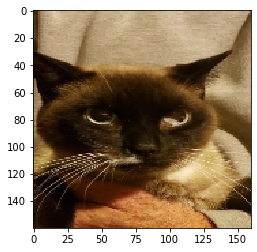

The model guessed this was: siamese.
This actually is: bombay.



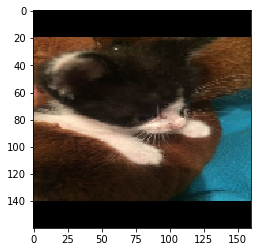

The model guessed this was: bombay.
This actually is: siamese.



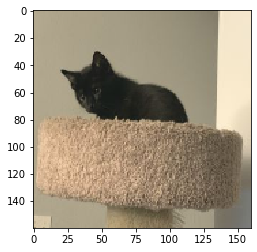

The model guessed this was: bombay.
This actually is: siamese.



In [42]:
#show the top 3 misclassified pictures
for index in row_inds[:3]:
    visual_result(index)

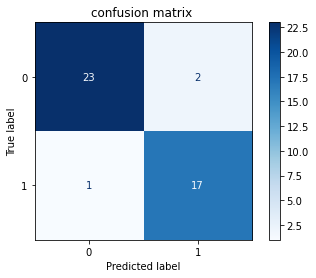

In [44]:
plot_confusion_matrix(model, cats_test, y_test, cmap = 'Blues', values_format = 'd')
plt.title('confusion matrix ');